In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/shikh/OneDrive/Desktop/Restaurant rating/Data/Dataset.csv")

# Drop irrelevant columns
drop_cols = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose',
             'Longitude', 'Latitude', 'Rating color', 'Rating text']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Drop rows with missing values in important fields
df.dropna(subset=['Cuisines', 'City', 'Price range', 'Has Online delivery', 'Has Table booking'], inplace=True)

# Optionally filter top cuisines only (to avoid too many classes)
top_cuisines = df['Cuisines'].value_counts().nlargest(10).index.tolist()
df = df[df['Cuisines'].isin(top_cuisines)]


In [2]:
le = LabelEncoder()
for col in ['City', 'Currency', 'Has Online delivery', 'Has Table booking']:
    df[col] = le.fit_transform(df[col].astype(str))

# Encode target (cuisines)
df['Cuisines'] = le.fit_transform(df['Cuisines'])


In [3]:
X = df.drop(columns=['Cuisines'])  # Features
y = df['Cuisines']                 # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid modifying the original dataframe
df_encoded = df.copy()

# Identify columns with object (string) data type
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each of those columns
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))


In [6]:
X = df_encoded.drop(columns=['Cuisines'])  # Features
y = df_encoded['Cuisines']                 # Target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [8]:
from sklearn.metrics import classification_report, accuracy_score

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.2865248226950355

Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.10      0.13        41
           1       0.15      0.10      0.12        31
           2       0.39      0.49      0.43        57
           3       0.13      0.09      0.11        75
           4       0.22      0.15      0.18        74
           5       0.40      0.53      0.45       191
           6       0.23      0.27      0.25       100
           7       0.17      0.15      0.16        65
           8       0.10      0.07      0.08        46
           9       0.32      0.32      0.32        25

    accuracy                           0.29       705
   macro avg       0.23      0.23      0.22       705
weighted avg       0.26      0.29      0.27       705



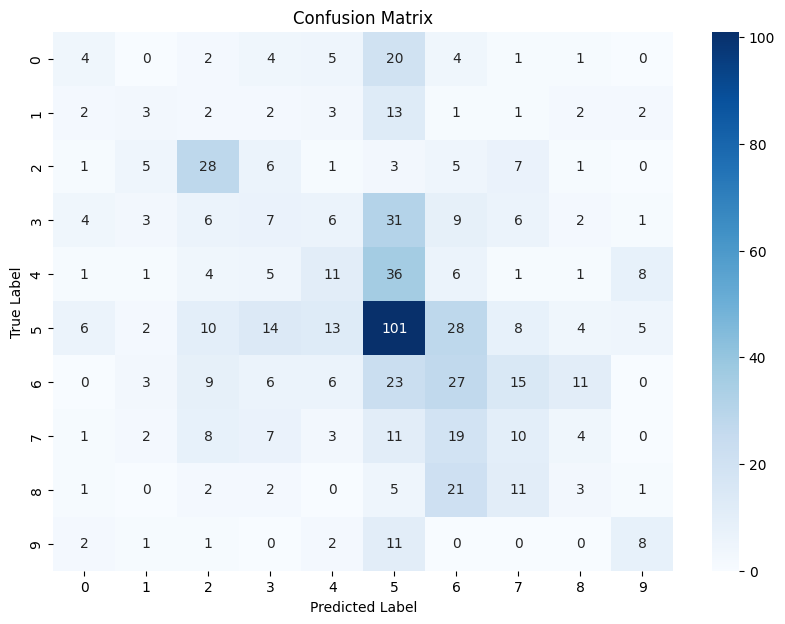

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


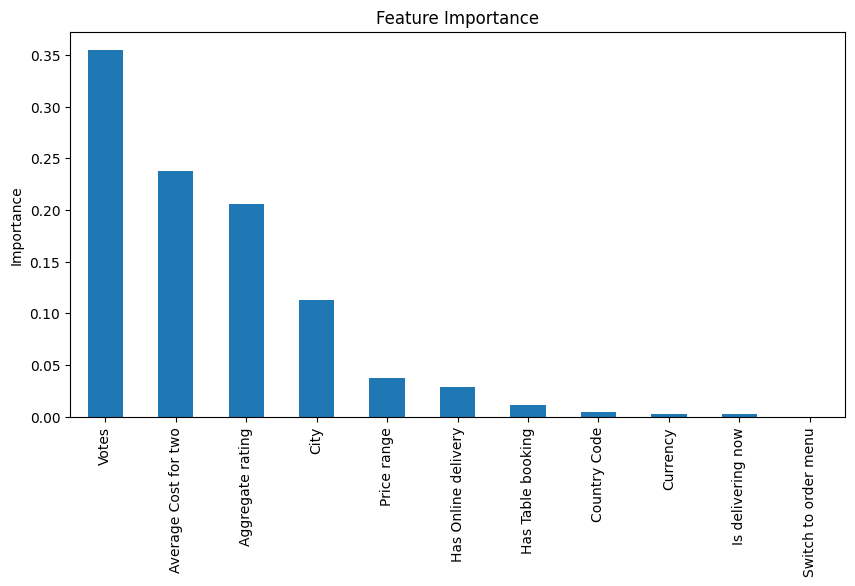

In [10]:
# Feature Importance
import pandas as pd

feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title="Feature Importance")
plt.ylabel("Importance")
plt.show()
